In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 2.2.1

Estimate π/4. Count number of Uniform random pairs (x,y) in a quarter of unit circle.

In [2]:
np.pi/4

0.7853981633974483

In [5]:
N = 1_000
x = np.random.rand(N)
y = np.random.rand(N)
in_circle = (x**2+y**2) < 1.0
in_circle.sum()/N

0.795

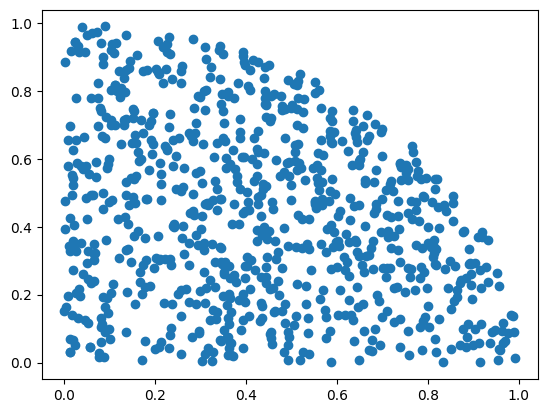

In [6]:
plt.scatter(x[in_circle], y[in_circle])